In [1]:
import numpy as np
import numpyro
import numpyro.distributions as dist
from numpyro.infer import MCMC, NUTS
from jax import random
import jax.numpy as jnp
import matplotlib.pyplot as plt

ModuleNotFoundError: No module named 'numpyro'

In [350]:
def FA_L1(X, num_factors, sparsity_scale=0.03, sparse=False):
    
    num_samples, num_features = X.shape

    # # Priors for the factor loadings with L1 regularization (Laplace prior)
    # with numpyro.plate('Features', num_factors):
    #     if sparse:
    #         f = numpyro.sample('features', dist.Laplace(0, sparsity_scale).expand([num_features]).to_event(1))
    #     else:
    #         f = numpyro.sample('features', dist.Normal(0, 1).expand([num_features]).to_event(1))

    f = numpyro.sample('features', dist.Laplace(jnp.zeros((num_factors, num_features)), sparsity_scale))
    # print(f.shape)

    # # Priors for the latent factors
    # with numpyro.plate('Samples', num_factors):
    #     if sparse:
    #         s = numpyro.sample('samples', dist.Laplace(0, sparsity_scale).expand([num_samples]).to_event(1))
    #     else:
    #         s = numpyro.sample('samples', dist.Normal(0, 1).expand([num_samples]).to_event(1))

    # print(s.shape)
    s = numpyro.sample('samples', dist.Laplace(jnp.zeros((num_factors, num_samples)), sparsity_scale))

    
    # Likelihood
    numpyro.sample('obs', dist.Normal(jnp.matmul(s.T, f), 1), obs=X)

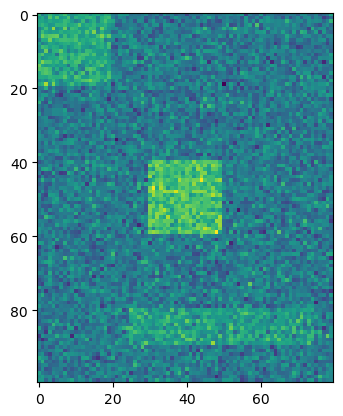

In [351]:
# Example usage
X = np.random.randn(100, 80)  # Replace with your data
# add a rank-1 submatries with a sparse factorization
X[:20, :20] += 2.0
X[40:60, 30:50] += 3.0
X[80:90, 25:75] += 1.5

plt.imshow(X)
num_factors = 5 # Number of latent factors

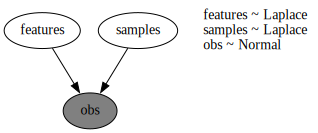

In [352]:
# render the model
numpyro.render_model(FA_L1, model_args=(X,num_factors), render_distributions=True)

In [353]:
# Running MCMC
kernel = NUTS(FA_L1)
mcmc = MCMC(kernel, num_warmup=500, num_samples=1000)
mcmc.run(random.PRNGKey(0), X, num_factors, sparsity_scale=1.0)

# Getting the posterior samples
posterior_samples = mcmc.get_samples()

sample: 100%|██████████| 1500/1500 [00:04<00:00, 305.49it/s, 63 steps of size 8.11e-02. acc. prob=0.83]


(5, 80)
(5, 100)


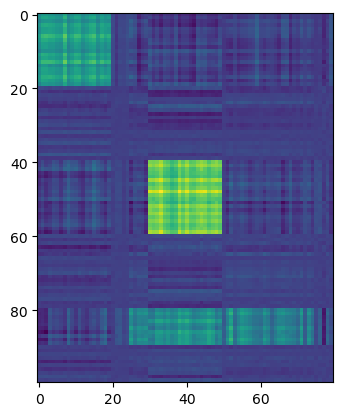

In [354]:
# plot the reconstructed X matrix
f=posterior_samples['features'].mean(axis=0)
s=posterior_samples['samples'].mean(axis=0)
print(f.shape)
print(s.shape)
plt.imshow(np.matmul(s.T, f))
plt.show()

In [355]:
l.shape

(3, 80)

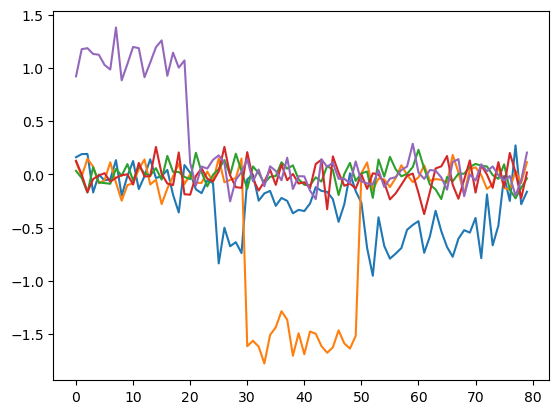

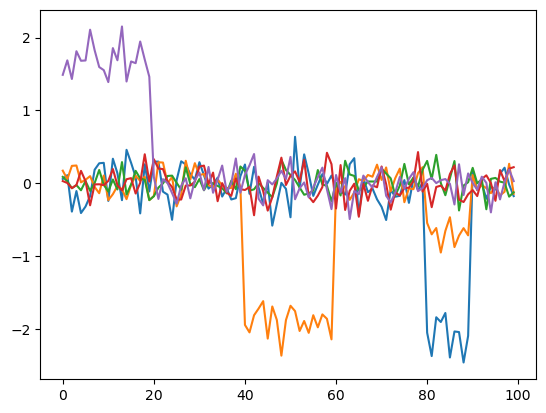

In [356]:
f.shape
plt.plot(f.T)
plt.show()
plt.plot(s.T)
plt.show()